In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Reading and making a copy of the dataset

dataset = pd.read_csv("marketing_campaign.csv", sep="\t")
df = dataset.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Here we have only 3 object type datatype and rest are numerical.

In [4]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

**NOTE** 
* In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them.  

In [5]:
# Checking if any NaN is present in column or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

* Income column have some missing value in it so we will need to fill it by by either mean or median.

In [6]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


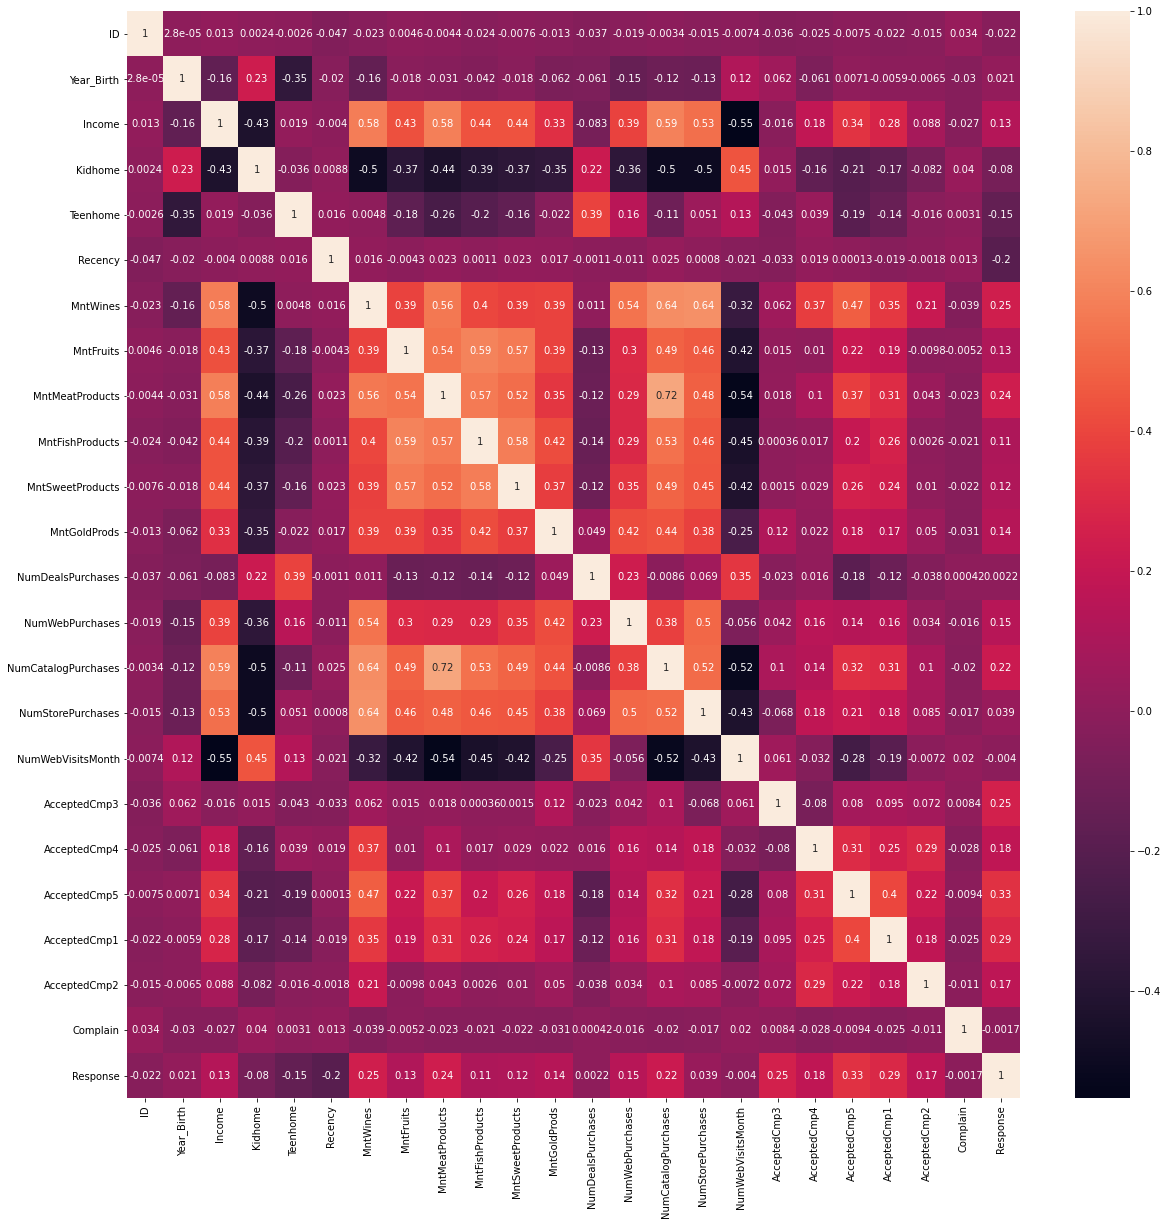

In [7]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
# Checking for correlation by unstacking data

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

### Preprocessing of the dataset

In [9]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [11]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [13]:
# Count of different values present in Marital_Status

df['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [14]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']


In [15]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [16]:
# Adding a column "Age" in the dataframe

df['Age'] = 2021 - df["Year_Birth"]

In [17]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [18]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [19]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2021'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [20]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 14)

### Visualization

In [21]:
df.describe()

,Income,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Kids,Expenses,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.950446,605.798214,14.862054,52.194196,2730.043304
std,25037.797168,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.751803,602.249288,7.677173,11.984069,232.229893
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,25.000000,2218.000000
25%,35538.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,8.000000,44.000000,2558.750000
50%,51741.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,396.000000,15.000000,51.000000,2731.000000
75%,68289.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1045.500000,21.000000,62.000000,2903.250000
max,666666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2525.000000,44.000000,128.000000,3281.000000


<AxesSubplot:>

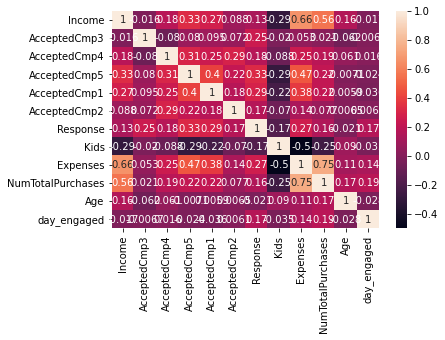

In [22]:
sns.heatmap(df.corr(), annot=True)

In [23]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [25]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### Label Encoding

In [26]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [27]:
df1 = df.copy()

### Standardization 

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


columns_index=('Age','Income', 'Expenses',
       'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 
       'AcceptedCmp5','NumTotalPurchases','day_engaged','Response')
df = df.reindex(columns=columns_index)

df.shape

X = df.iloc[:,0:10].values
y = df.iloc[:,-1:].values





In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [32]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=4,n_estimators=260)
classifier.fit(X_train, y_train)

print(classifier)

# make predictions for test data
y_pred = classifier.predict(X_test)

np.unique(y_pred,return_counts=True)


from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy))

conf=confusion_matrix(y_test,y_pred)

print(conf)


print("F1_Score",f1_score(y_test,y_pred))




C:\Users\ASHWINTH R\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ASHWINTH R\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=260, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 0.86%
[[354  14]
 [ 48  32]]
F1_Score 0.50

### Report 

#### Based on above information - 

1. These DataSet doesn't contain valid Features to predict the Promotion .
2. Since the Accuracy got 86% Still TN, TP, FP, FN are not in correlated correctly
3. The Precision and Recall (F1_Score) has gotten the 50% due to an inaccurate dataset with overfitting

